<table align="right" width=100%>
    <tr>
        <td width="30%">
            <img src="Zen-Logo-Final.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Zentaix AC Data Analysis, Exploration and Forecasting</b>
                </font>
             </div>
        </td>
    </tr>
</table>


### Problem Statement

Provided data contains power for multiple ACs at some hotel in Gurgaon.

1. Identify patterns/trends in the data?

2. Which AC was used the most/least?

**Optional (Bonus questions):**

1. Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?

2. Using the power data, predict/forecast the power consumption?

This problem is open-ended for exploration analysis. Feel free to provide any insights from the data by loading the data using Python Pandas library. The more insights you get, the better.

<a id="home"></a>
## Table of Contents

1. **[Import Libraries](#lib)**
2. **[Data Understanding & Feature Extraction](#prep)**
    - 2.1 - **[Loading the Datasets](#load)**
    - 2.2 - **[Null Value Handling](#Null)**
    - 2.3 - **[Creating new features](#feat)**

3. **[Exploring the AC Data](#eda)**
    - 3.1 - **[Finding Most and Least used ACs](#hilow)**
    - 3.2 - **[Identifying Underlying Trends and patterns in the Data](#patterns)**

4. **[Optional Questions](#optional)**
    - 4.1 - **[Observing and comparing Gurgaon's Temperature](#gurgaon)**
    - 4.2 - **[Building Models for Forecasting](#model)**
        - 4.2.1 - **[Model 1: Simple Linear Regression on Temperature](#lr)**
        - 4.2.2 - **[Model 2: Triple Exponential Smoothening Model](#tes)**
5. **[Fina]**

<a id="lib"></a>
## 1. Import Libraries

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import statsmodels.api as sm

import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

sns.set_style('whitegrid')
%matplotlib inline

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore') 

#for displaying max columns
pd.pandas.set_option('display.max_columns', None)

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

<a id="prep"></a>
# 2. Data Understanding & Pre-Processing

<a id="load"></a>
## 2.1 Loading the Datasets

### Reading the Data using timeseries method

In [3]:
AC_data = pd.read_csv('AC_Data.csv', parse_dates=['0'],index_col='0')

In [4]:
AC_data.shape

(87840, 18)

In [5]:
AC_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87840 entries, 2019-08-01 00:00:00 to 2019-09-30 23:59:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC 1    43708 non-null  float64
 1   AC 2    43711 non-null  float64
 2   AC 3    43713 non-null  float64
 3   AC 4    43704 non-null  float64
 4   AC 5    43716 non-null  float64
 5   AC 6    43717 non-null  float64
 6   AC 7    43679 non-null  float64
 7   AC 8    43704 non-null  float64
 8   AC 9    43654 non-null  float64
 9   AC 10   43690 non-null  float64
 10  AC 11   43670 non-null  float64
 11  AC 12   43713 non-null  float64
 12  AC 13   43719 non-null  float64
 13  AC 14   43696 non-null  float64
 14  AC 15   43715 non-null  float64
 15  AC 16   43710 non-null  float64
 16  AC 17   43714 non-null  float64
 17  AC 18   43723 non-null  float64
dtypes: float64(18)
memory usage: 12.7 MB


In [6]:
AC_data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


### Based of the above table, we can observe that the AC power data is being collected every minute for duration of `2019-08-01 to 2019-09-30`

In [6]:
# renaming the index
AC_data = AC_data.rename_axis(index='Date_time')

<a id="Null"></a>
## 2.2 Hanlding Null Values

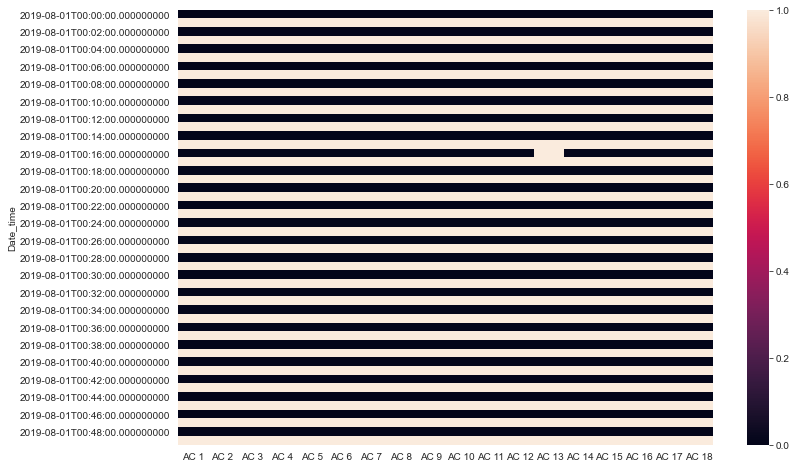

In [7]:
# visualising the nulls to see if there's any pattern

plt.figure(figsize=(12,8))
sns.heatmap(AC_data.head(50).isnull())
plt.show()

### We can clearly observe a specific pattern for the null values. 

- There's null value every minute interval.
- There are a few exceptions for some AC's in between, which we can ignore or impute further.
- Using forward fill to impute the null values at every one minute instance in the data.

In [7]:
# forward filling the nulls
AC_data = AC_data.ffill()

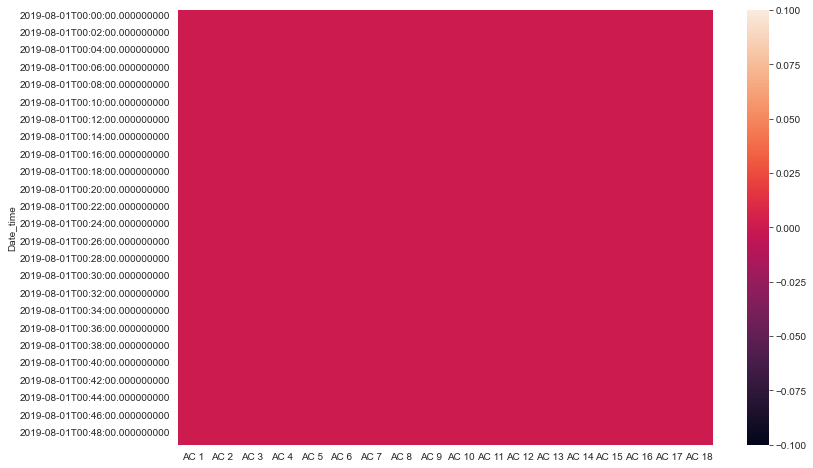

In [13]:
# Checking the nulls now

plt.figure(figsize=(12,8))
sns.heatmap(AC_data.head(50).isnull())
plt.show()

## Null values handled!

<a id="feat"></a>
## 2.3 Creating new features

#### Aggregating AC Power data by every 3 hour interval in a day

Why am I doing this?
- Well, mainly because to identify underlying patterns in just 2 months of data, we need to have the data at more broader level of hours rather than minute to minute data.
- The amount of data could have been an advantage to us if we had the data for more number of months at hourly interval rather than minutes interval.

In [54]:
ac_hourly_sum = AC_data.resample('3H').sum()

ac_hourly_sum.shape

(488, 18)

- Now, we have on total 488*3 = 1464 hours of data (61 days). with constant interval of 3 hours 

In [11]:
ac_hourly_sum.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date_time,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,1296.004545,1504.441416,286.458576,256.966985,387.601786,770.035814,482.440915,785.426521,589.328997,481.094565,272.812927,349.370439,830.133298,955.266276,1068.488925,847.408679,476.870216,785.605081
2019-08-01 03:00:00,1167.030958,1338.986452,375.726472,458.026866,334.596156,762.515319,512.897797,651.866431,539.581685,466.662479,223.758937,327.445633,753.700948,802.557088,895.377723,868.377965,750.640495,909.851654
2019-08-01 06:00:00,790.033315,1266.014835,324.718914,437.947981,312.911023,596.627900,517.075472,462.839761,506.356784,351.098649,198.124449,336.321558,853.622808,515.786462,845.040800,654.807649,848.214198,1690.501596
2019-08-01 09:00:00,380.227013,1273.446589,319.730032,368.456115,207.975347,425.582709,411.708042,571.832396,433.376646,212.196038,341.069323,333.849916,806.004054,327.826818,603.816109,490.230450,905.040060,1636.582789
2019-08-01 12:00:00,263.439939,1256.862532,390.250838,505.094725,163.784743,203.900769,244.492690,800.689052,385.739062,230.545130,461.956761,571.737922,736.239408,276.640375,668.181011,385.570704,955.074902,1374.739631


In [55]:
# adding a new column with total aggregated power usage by all the ACs
ac_hourly_sum['TotalACPower'] = ac_hourly_sum.sum(axis=1)

In [56]:
# taking out time date, and weekday variable for further granual analysis

ac_hourly_sum['Time'] = ac_hourly_sum.index.time

ac_hourly_sum['Date'] = ac_hourly_sum.index.date

ac_hourly_sum['WeekDay'] = ac_hourly_sum.index.day_name()

ac_hourly_sum.head(2)

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,TotalACPower,Time,Date,WeekDay
Date_time,,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,1296.004545,1504.441416,286.458576,256.966985,387.601786,770.035814,482.440915,785.426521,589.328997,481.094565,272.812927,349.370439,830.133298,955.266276,1068.488925,847.408679,476.870216,785.605081,12425.755960,00:00:00,2019-08-01,Thursday
2019-08-01 03:00:00,1167.030958,1338.986452,375.726472,458.026866,334.596156,762.515319,512.897797,651.866431,539.581685,466.662479,223.758937,327.445633,753.700948,802.557088,895.377723,868.377965,750.640495,909.851654,12139.601057,03:00:00,2019-08-01,Thursday


<a id="eda"></a>

# [3. EDA on the AC Data](#home)

<a id="hilow"></a>

## 3.1 Finding Most and Least used ACs

In [50]:
AC_Total_power = AC_data.sum()

# using cufflink plot for better intuitive plot
AC_Total_power.sort_values(ascending=False).iplot(title='AC Total Power Consuption(Highest to lowest)',
                                                  kind='bar')
plt.show()

In [12]:
df_AC_Total_power =  pd.DataFrame(AC_Total_power.values, index=AC_Total_power.index, columns=['Total AC Power'])

In [13]:
df_AC_Total_power['Average AC Power Consumption of Hotel'] = AC_Total_power.mean()

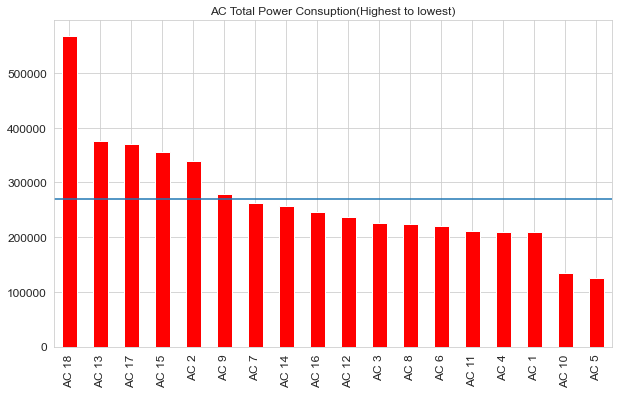

In [14]:
df_AC_Total_power['Total AC Power'].sort_values(ascending=False).plot(title = 'AC Total Power Consuption(Highest to lowest)', kind='bar', color='r',fontsize=12, figsize=(10,6))
plt.axhline(df_AC_Total_power['Average AC Power Consumption of Hotel'].iloc[1])
plt.show()

## Observation:

- We can clearly see that `AC 18` is the one with highest cumulative consumption of power for period `2019/08/01 to 2019/09/30`.

- `AC 5` is the one with least power consumption for the same duration.

- Additionally, we can identify that the `AC 9` is closest to the Average Power Consumption of Hotel and we can choose this AC for future observation and analysis.

<a id="pattern"></a>

## 3.2 Finding patterns with Total AC Usage based on Weekdays and Daily usage

### Using Pivot table for finding any pattern of average of AC Power usage during the entire day

In [61]:
pd.pivot_table(ac_hourly_sum[['TotalACPower','Time','WeekDay']], index='Time',aggfunc='mean')

,TotalACPower
Time,
00:00:00,11288.282503
03:00:00,10781.154284
06:00:00,10220.905273
09:00:00,9236.772180
12:00:00,8938.161934
15:00:00,9345.792547
18:00:00,9126.026878
21:00:00,10558.759524


In [74]:
pd.pivot_table(ac_hourly_sum[['TotalACPower','Time','WeekDay']], index='Time',aggfunc='mean').iplot(title='AC Usage Trend Throughout the day')
plt.show()

### Using Pivto table for finding any pattern of average Total AC Power usage during the Weekdays

In [75]:
pd.pivot_table(ac_hourly_sum[['TotalACPower','Time','WeekDay']], index='WeekDay',aggfunc='mean')

,TotalACPower
WeekDay,
Friday,10011.275731
Monday,9229.543550
Saturday,9665.908335
Sunday,9520.158053
Thursday,10806.295941
Tuesday,10050.271737
Wednesday,10331.885865


In [76]:
pd.pivot_table(ac_hourly_sum[['TotalACPower','Time','WeekDay']], index='WeekDay',aggfunc='mean').iplot(title='AC Usage Trend through the WeekDays')

## Observation:

- The above chart shows the underlying pattern of the average of `Total AC power` consuption in the Hotel at interval of every 3Hours for every WeekDays.
- We can further observe a clear trend in power consumption that the AC Power consumption is usually at peak during the late night or after evening. 
- This behaviour can be explained in general terms and trends in occupancy of Hotels across the Globe; that the Hotel rooms are usually used during the nights and are charged accordingly. 
- The lowest trend value for AC usage is on `Monday` (Monday Blues!)
- Surprisingly highest power usage line is for `Thursday` and not Weekends.

<a id="optional"></a>

# [4. Optional Questions](#home)

<a id="gurgaon"></a>

## 4.1 Observing Gurgaon Weather Temperature for Aug'19 to Sep'19

### Gurgaon Temp from Aug 2019 to Sep 2019 imported from: https://www.worldweatheronline.com/developer/api/historical-weather-api.aspx

- Special thanks to GitHub repository of EkaPopeV (https://github.com/ekapope) https://github.com/ekapope/WorldWeatherOnline 

In [17]:
gurgaon_temp = pd.read_csv('gurgaon_temp_every_3hour.csv', parse_dates=['date_time'],index_col='date_time')

In [33]:
gurgaon_temp.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,36,30,0.0,13.7,9,0,05:37 AM,07:38 PM,05:44 AM,07:13 PM,21,35,35,31,13,15,56,0.0,998,31,10,86,11,gurgaon
2019-08-01 03:00:00,36,30,0.0,13.7,9,0,05:37 AM,07:38 PM,05:44 AM,07:13 PM,22,34,34,30,14,28,62,0.0,998,30,10,118,11,gurgaon
2019-08-01 06:00:00,36,30,0.0,13.7,9,0,05:37 AM,07:38 PM,05:44 AM,07:13 PM,23,38,38,33,13,27,59,0.5,1000,33,9,127,11,gurgaon
2019-08-01 09:00:00,36,30,0.0,13.7,9,0,05:37 AM,07:38 PM,05:44 AM,07:13 PM,22,41,41,36,15,30,44,1.6,999,36,9,129,13,gurgaon
2019-08-01 12:00:00,36,30,0.0,13.7,9,0,05:37 AM,07:38 PM,05:44 AM,07:13 PM,22,42,42,36,14,43,43,0.0,998,36,10,112,12,gurgaon


In [18]:
gurgaon_temp[['FeelsLikeC','tempC']].iplot(title = 'Actual and Feels Like Temperature in Gurgaon from Aug 2019 to Sep 2019')
plt.show()

In [19]:
gurgaon_temp[['FeelsLikeC','precipMM']].iplot(title = 'Feels Like Temperature and Precipitation(MM) in Gurgaon from Aug 2019 to Sep 2019')
plt.show()

In [36]:
gurgaon_temp[['tempC','FeelsLikeC', 'precipMM']].corr()

,tempC,FeelsLikeC,precipMM
tempC,1.000000,0.956058,-0.148838
FeelsLikeC,0.956058,1.000000,-0.077442
precipMM,-0.148838,-0.077442,1.000000


### Inference:

- We can see interesting patterns with the outside temperature of Gurgaon when compared with rains and FeelsLike Temp.
- Feelslike Temp is directly related with actual temp and is always higher than the actual one.
- Whenever it rains, the dip in temp is recorded which might be directly affecting the AC usage.

### Using `FeelsLikeC` for comparison of AC's Power usage with Gurgaon outside temperature.

In [20]:
ac_hourly_with_temp = pd.concat([gurgaon_temp['FeelsLikeC'], ac_hourly_sum], axis=1, join='inner')

In [21]:
ac_hourly_with_temp.head()

,FeelsLikeC,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,TotalACPower,Time,Date,WeekDay
2019-08-01 00:00:00,35,1296.004545,1504.441416,286.458576,256.966985,387.601786,770.035814,482.440915,785.426521,589.328997,481.094565,272.812927,349.370439,830.133298,955.266276,1068.488925,847.408679,476.870216,785.605081,12425.755960,00:00:00,2019-08-01,Thursday
2019-08-01 03:00:00,34,1167.030958,1338.986452,375.726472,458.026866,334.596156,762.515319,512.897797,651.866431,539.581685,466.662479,223.758937,327.445633,753.700948,802.557088,895.377723,868.377965,750.640495,909.851654,12139.601057,03:00:00,2019-08-01,Thursday
2019-08-01 06:00:00,38,790.033315,1266.014835,324.718914,437.947981,312.911023,596.627900,517.075472,462.839761,506.356784,351.098649,198.124449,336.321558,853.622808,515.786462,845.040800,654.807649,848.214198,1690.501596,11508.044154,06:00:00,2019-08-01,Thursday
2019-08-01 09:00:00,41,380.227013,1273.446589,319.730032,368.456115,207.975347,425.582709,411.708042,571.832396,433.376646,212.196038,341.069323,333.849916,806.004054,327.826818,603.816109,490.230450,905.040060,1636.582789,10048.950447,09:00:00,2019-08-01,Thursday
2019-08-01 12:00:00,42,263.439939,1256.862532,390.250838,505.094725,163.784743,203.900769,244.492690,800.689052,385.739062,230.545130,461.956761,571.737922,736.239408,276.640375,668.181011,385.570704,955.074902,1374.739631,9874.940195,12:00:00,2019-08-01,Thursday


## Checking correlation of Temp with AC's power usage

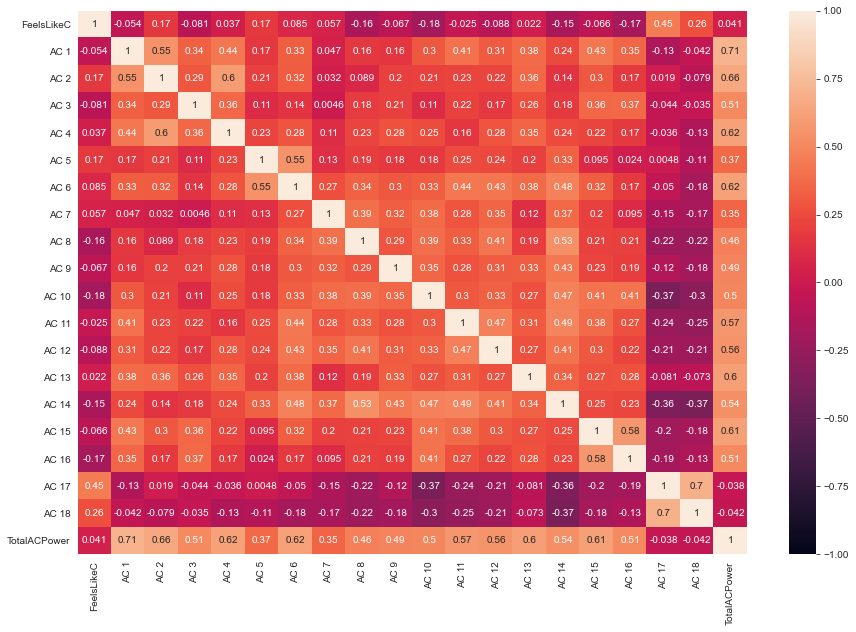

In [39]:
plt.figure(figsize=(15,10))

sns.heatmap(ac_hourly_with_temp.iloc[:,0:-3].corr(), annot=True,vmax=1, vmin=-1)

plt.show()

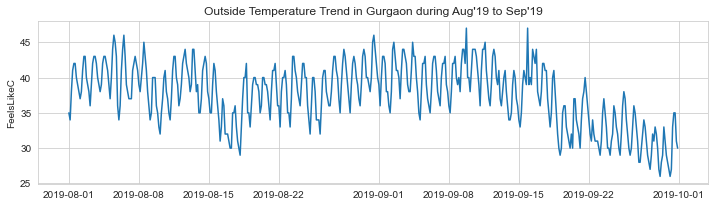

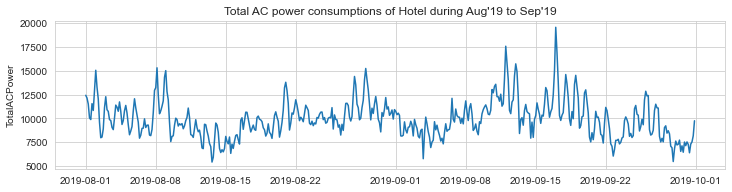

In [44]:
plt.figure(figsize=(12,3))
plt.subplot(1,1,1)
plt.title("Outside Temperature Trend in Gurgaon during Aug'19 to Sep'19")
sns.lineplot(y=ac_hourly_with_temp['FeelsLikeC'], x=ac_hourly_with_temp.index)
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Total AC power consumptions of Hotel during Aug'19 to Sep'19")
sns.lineplot(y=ac_hourly_with_temp['TotalACPower'], x=ac_hourly_with_temp.index)
plt.show()


# Using Decomposition to analyse the underlying Trend and Seasonality in the Data

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
additive_decomposition = seasonal_decompose(ac_hourly_with_temp['TotalACPower'], model='additive')

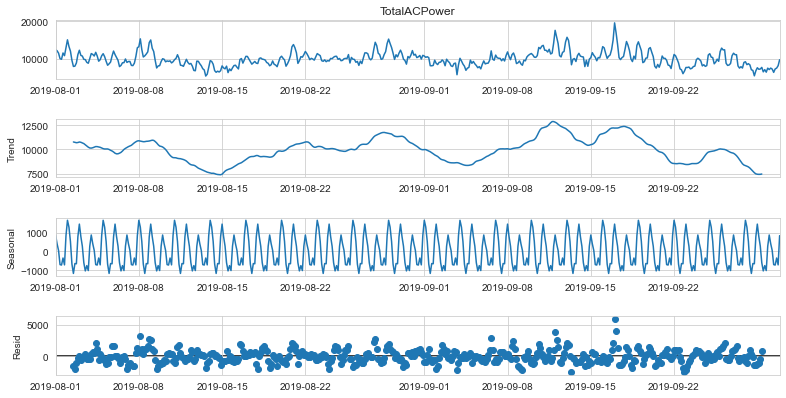

In [47]:
fig = additive_decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

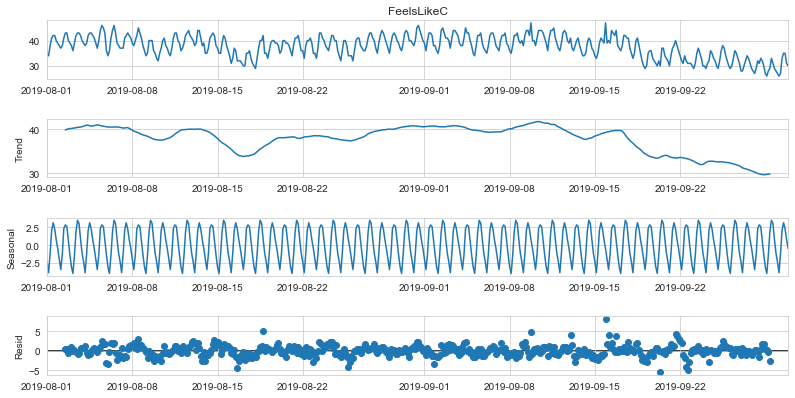

In [48]:
additive_decomposition_temp = seasonal_decompose(ac_hourly_with_temp['FeelsLikeC'], model='add')

fig = additive_decomposition_temp.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

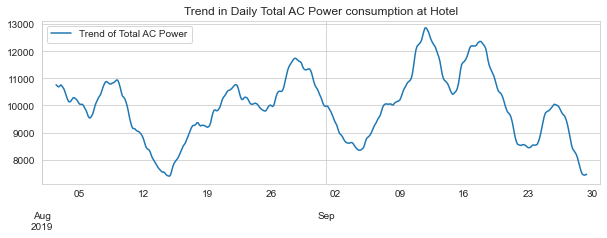

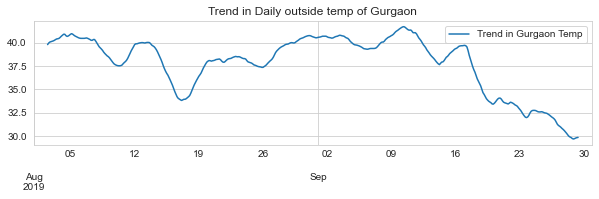

In [56]:
plt.subplot(1,1,1)
plt.title('Trend in Daily Total AC Power consumption at Hotel')
additive_decomposition.trend.plot(figsize=(10,3))

plt.legend(['Trend of Total AC Power'])

plt.show()

plt.subplot(2,1,1)
plt.title('Trend in Daily outside temp of Gurgaon')
additive_decomposition_temp.trend.plot(figsize=(10,5))
plt.legend(['Trend in Gurgaon Temp'])
plt.show()

## Observation:

- From the above comparison in trend we can say that the trend in the Power usage across the ACs is almost matching the trend in Gurgaon's temperature. 
- However, the scale of the trends are different.
- The peaks and troughs are extreme for AC's power usage, which can be due to several other factors such as Hotel room occupancy, customer usage behavior etc, suddent peak or rush hours, weekends and weekdays occupancy patterns.

<a id="model"></a>

## [4.2 Building Model for Forecasting Total AC Power Usage](#home)

#### Splitting the data into train and test and plotting the training and test data. [Taking 20% of the most recent data the test set]

In [22]:
train = ac_hourly_with_temp[0:int(len(ac_hourly_with_temp)*0.8)][['FeelsLikeC','TotalACPower']]   
test = ac_hourly_with_temp[int(len(ac_hourly_with_temp)*0.8):][['FeelsLikeC','TotalACPower']] 

print(train.shape)
print(test.shape)

(390, 2)
(98, 2)


In [23]:
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('First few rows of Test Data')
display(test.head())

First few rows of Training Data


,FeelsLikeC,TotalACPower
2019-08-01 00:00:00,35,12425.755960
2019-08-01 03:00:00,34,12139.601057
2019-08-01 06:00:00,38,11508.044154
2019-08-01 09:00:00,41,10048.950447
2019-08-01 12:00:00,42,9874.940195


First few rows of Test Data


,FeelsLikeC,TotalACPower
2019-09-18 18:00:00,35,9959.060483
2019-09-18 21:00:00,32,13566.196301
2019-09-19 00:00:00,30,14526.807052
2019-09-19 03:00:00,29,13383.409227
2019-09-19 06:00:00,30,12158.267723


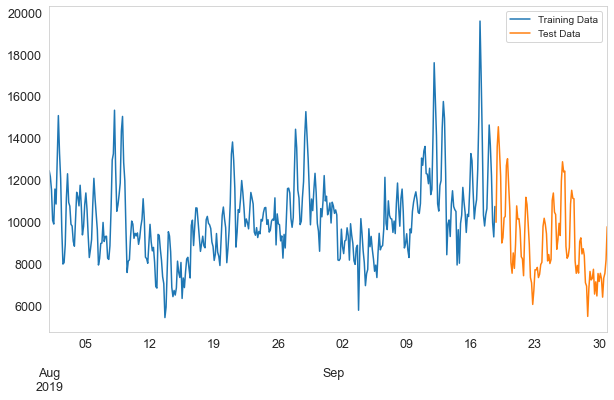

In [62]:
train['TotalACPower'].plot(fontsize=12.5)
test['TotalACPower'].plot(fontsize=12.5)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

- It will be difficult to predict the future observations if such an instance has not happened in the past. 
- From the train-test split I am predicting likewise behaviour as compared to the past days.

<a id ='lr'></a>
### 4.2.1 Model 1: Linear Regression

- For this particular linear regression, I am going to regress the 'Total AC Power' variable against the outside temprature of Gurgaon.

In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [64]:
lr.fit(X = train[['FeelsLikeC']], y = train['TotalACPower'])

LinearRegression()

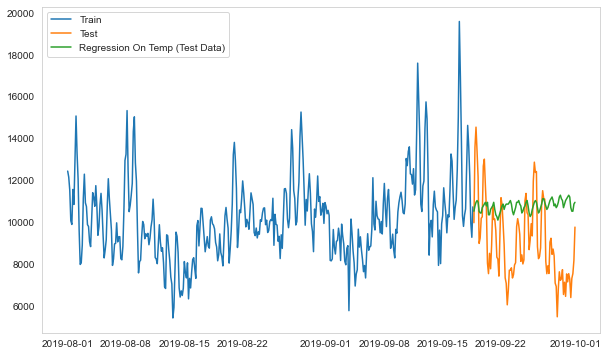

In [65]:
#train_predictions_model1 = lr.predict(train[['FeelsLikeC']])

#LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(test[['FeelsLikeC']])
test['RegOnTemp'] = test_predictions_model1

plt.plot(train['TotalACPower'], label='Train')
plt.plot(test['TotalACPower'], label='Test')
plt.plot(test['RegOnTemp'], label='Regression On Temp (Test Data)')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [66]:
from sklearn import metrics

### Model Evaluation

In [67]:
rmse_model1_test = metrics.mean_squared_error(test['TotalACPower'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2540.048 


In [68]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTemp'])
resultsDf

,Test RMSE
RegressionOnTemp,2540.048471


### Inference:

- We can see that the Model 1: Simple regression model doesn't perform well at all. 
- This model is just catching the pattern of seasonality and not the trend.
- I will try one more model, to further enhance the predictions, which is Triple Exponential Smoothening method. This model should give us better results on predictions as it will catch trends, seasonality and the errors.

<a id ='tes'></a>
### 4.2.2 Model 2: Holt-Winters Triple Exponential- TES with additive errors

In [69]:
from statsmodels.tsa.api import ExponentialSmoothing # SimpleExpSmoothing, Holt

In [70]:
train.shape, test.shape

((390, 2), (98, 3))

In [71]:
test = test.drop(test.columns[-1],axis=1)

In [72]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['TotalACPower'],trend='add',seasonal='add',initialization_method='estimated')

# Fitting the model
model_TES = model_TES.fit()

In [73]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9596428571428571, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.04035714285714287, 'damping_trend': nan, 'initial_level': 10848.906628706962, 'initial_trend': -37.44967905745216, 'initial_seasons': array([  333.76691178,   151.85816205,  -235.43821504,  -354.73297724,
        -680.90992711, -1200.34955672,  -634.16360902,   760.32400468,
        1593.99672628,  1978.4784462 ,  1035.25725211,  -370.72299489,
       -1174.64786718,  -903.3541268 ,  -156.52527291,  1610.21814259,
        2096.56165489,   848.21973404,   350.59091956,  -780.29011132,
       -1355.14527489, -1461.52936658, -1477.35899269,    25.89633821]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [75]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test['TotalACPower']))

TES_predict.iloc[:5]

2019-09-18 18:00:00    10256.337429
2019-09-18 21:00:00    11846.047284
2019-09-19 00:00:00    12785.838109
2019-09-19 03:00:00    12748.653728
2019-09-19 06:00:00    12071.263403
Freq: 3H, dtype: float64

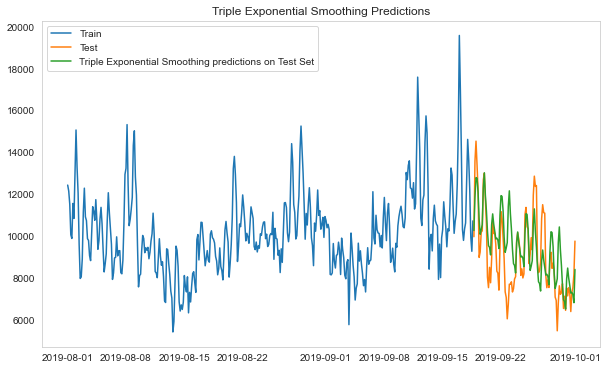

In [76]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['TotalACPower'], label='Train')
plt.plot(test['TotalACPower'], label='Test')

plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

- We see that the Triple Exponential Smoothing is picking up the trend and seasonal component quite well.
- Let's see how this model stands on the evaluation

In [77]:
print('TES RMSE:',metrics.mean_squared_error(test['TotalACPower'].values,TES_predict.values,squared=False))

TES RMSE: 1493.7843287265373


In [78]:
resultsDf.loc['TripleExponentialSmoothening'] = metrics.mean_squared_error(test['TotalACPower'].values,
                                                                           TES_predict.values,
                                                                           squared=False)

resultsDf

,Test RMSE
RegressionOnTemp,2540.048471
TripleExponentialSmoothening,1493.784329


### Inference

- Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

## From the above results, we can go ahead and select the Triple Exponential Smoothening as the final model for Forecasting the Trends and Seasonality of the Total AC Power usage.

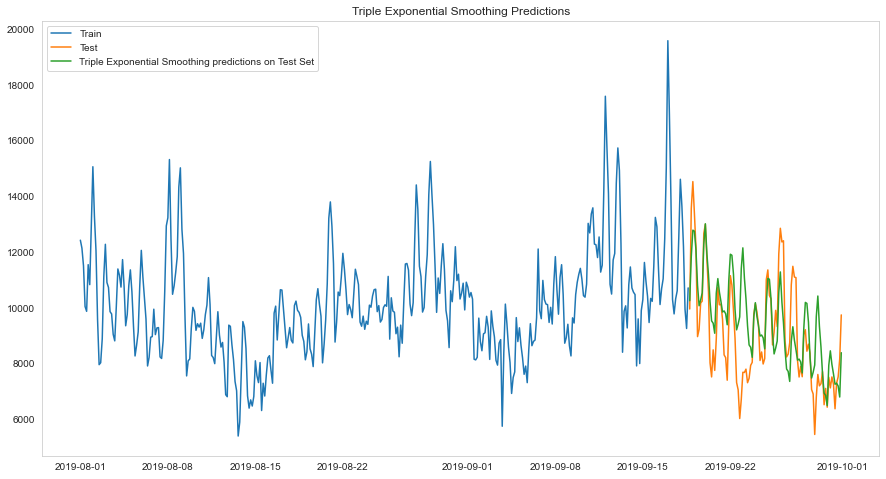

In [165]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Total AC Power'], label='Train')
plt.plot(test['Total AC Power'], label='Test')

plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

<a id = 'final'></a>

## [Final Inference:](#home)

- This model gives the best result on the variannce of the Total AC usage data. 
- We can see that few peaks and lows are not caught by the forecast very well.
- However, this model does the best job in terms of our RMSE metrics.
- So, we can conclude that there are some other factors which are possibly contributing to the AC power consumptions which might be following:
    - Room occupancy varies differently across all 18 rooms.
    - We have seen earlier that `AC18` is most used and least used is `AC5`.
    - So, different rooms contribute differently towards the total power consumption.
    - Consumer preferences may also contribute towards the usage pattern. (some prefer normal fan over AC)
    - Sudden weather changes may also change the pattern. (rain or precipitation)
    - Weekend and weekdays contribute towards the Room occupany and peak hours we have seen that are nights which contribute towards the Peak AC usage.